# **Import all libs and read csv file**
pandas for data manipulation, numpy for numerical computing/mathematical
computations, matplotlib and sns for data visualization, sklearn for machine learning







In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import root_mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Load the data
df = pd.read_csv('data.csv')
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


# **Data Visualization**

Histogram for all features helps us to visualize by showing how data is spread across different ranges.

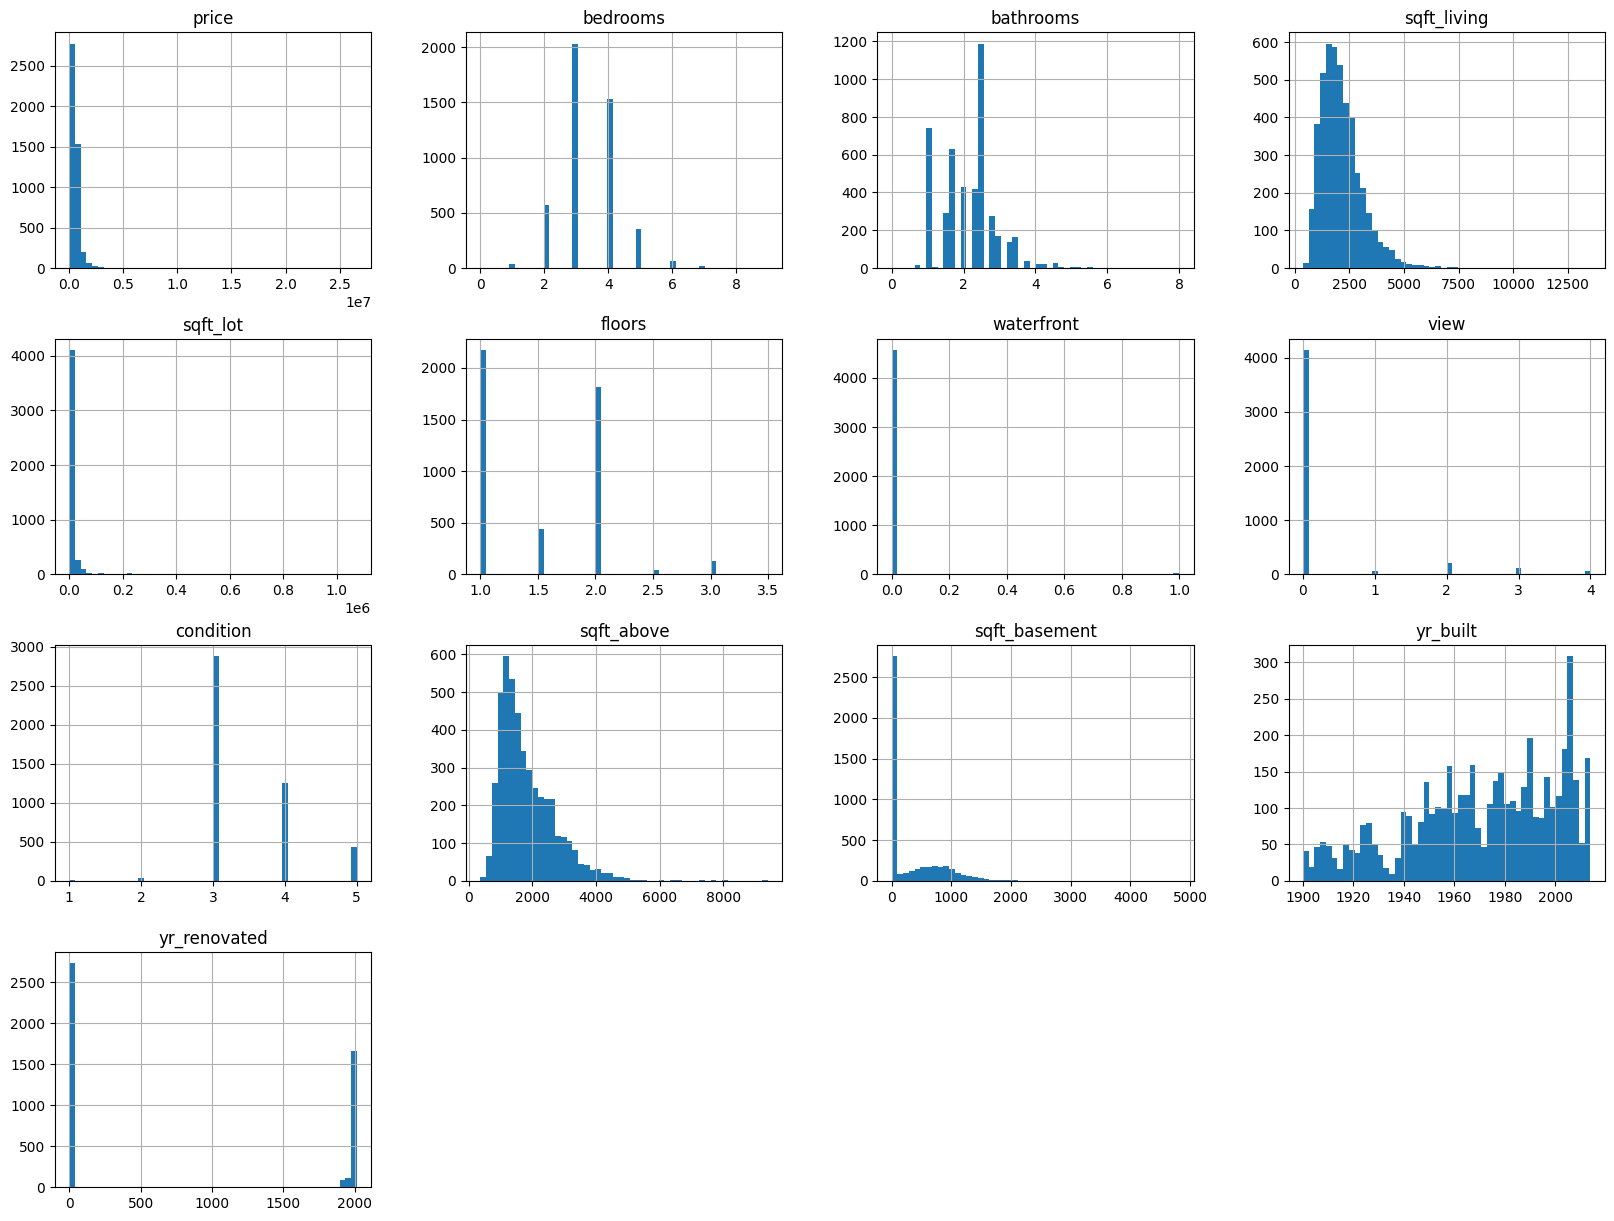

In [109]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Heatmap is used to see relationships between different numerical features

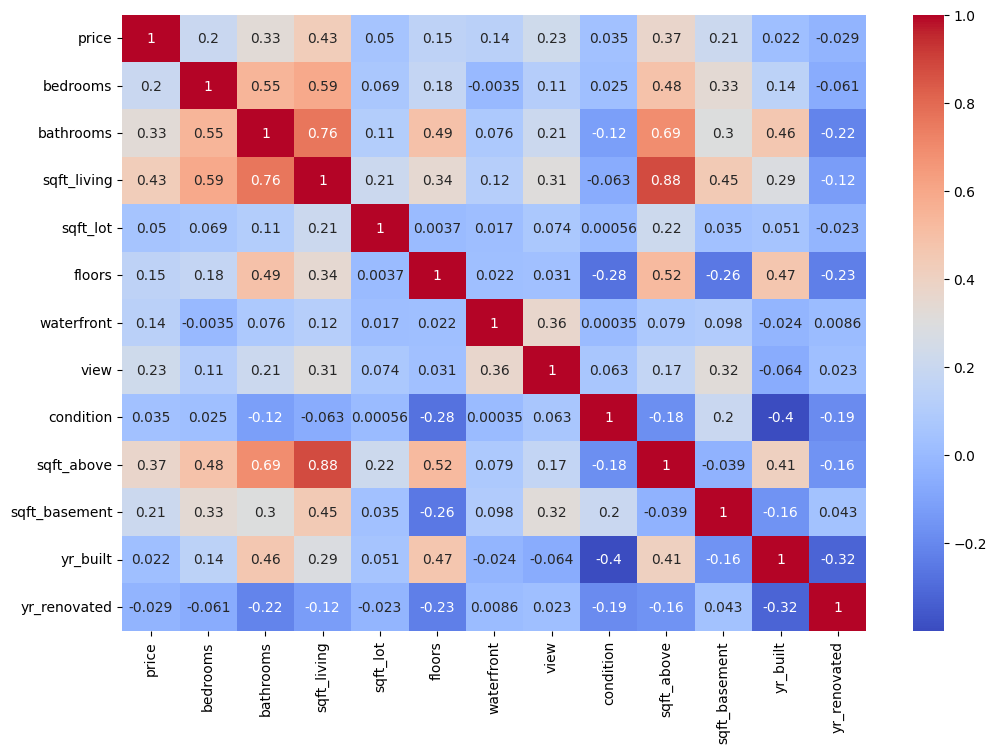

In [110]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Preprocessing
Encoding the 'city' column to numeric using Label Encoder for data consistency.
Rounding up the values for "bathrooms" and "floors" column to integers.
Dropping the "waterfront" and "view" columns.

In [111]:
# Convert categorical column 'city' to numerical values
encoder = LabelEncoder()
df['city_encoded'] = encoder.fit_transform(df[['city']])

#rounding values
df['bathrooms'] = df['bathrooms'].round().astype(int)
df['floors'] = df['floors'].round().astype(int)

df = df.drop('city', axis=1)
df=df.drop('waterfront', axis=1)
df=df.drop('view', axis=1)

print(f"Original dataset size: {df.shape}")
df

Original dataset size: (4600, 12)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_encoded
0,3.130000e+05,3,2,1340,7912,2,3,1340,0,1955,2005,36
1,2.384000e+06,5,2,3650,9050,2,5,3370,280,1921,0,35
2,3.420000e+05,3,2,1930,11947,1,4,1930,0,1966,0,18
3,4.200000e+05,3,2,2000,8030,1,4,1000,1000,1963,0,3
4,5.500000e+05,4,2,1940,10500,1,4,1140,800,1976,1992,31
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,2,1510,6360,1,4,1510,0,1954,1979,35
4596,5.343333e+05,3,2,1460,7573,2,3,1460,0,1983,2009,3
4597,4.169042e+05,3,2,3010,7014,2,3,3010,0,2009,0,32
4598,2.034000e+05,4,2,2090,6630,1,3,1070,1020,1974,0,35


# **Check for outliers**


Outliers are unusual values in dataset that are extremly different from normal values. Boxplotting helps to identify such spreads and potential outliers in the data. .

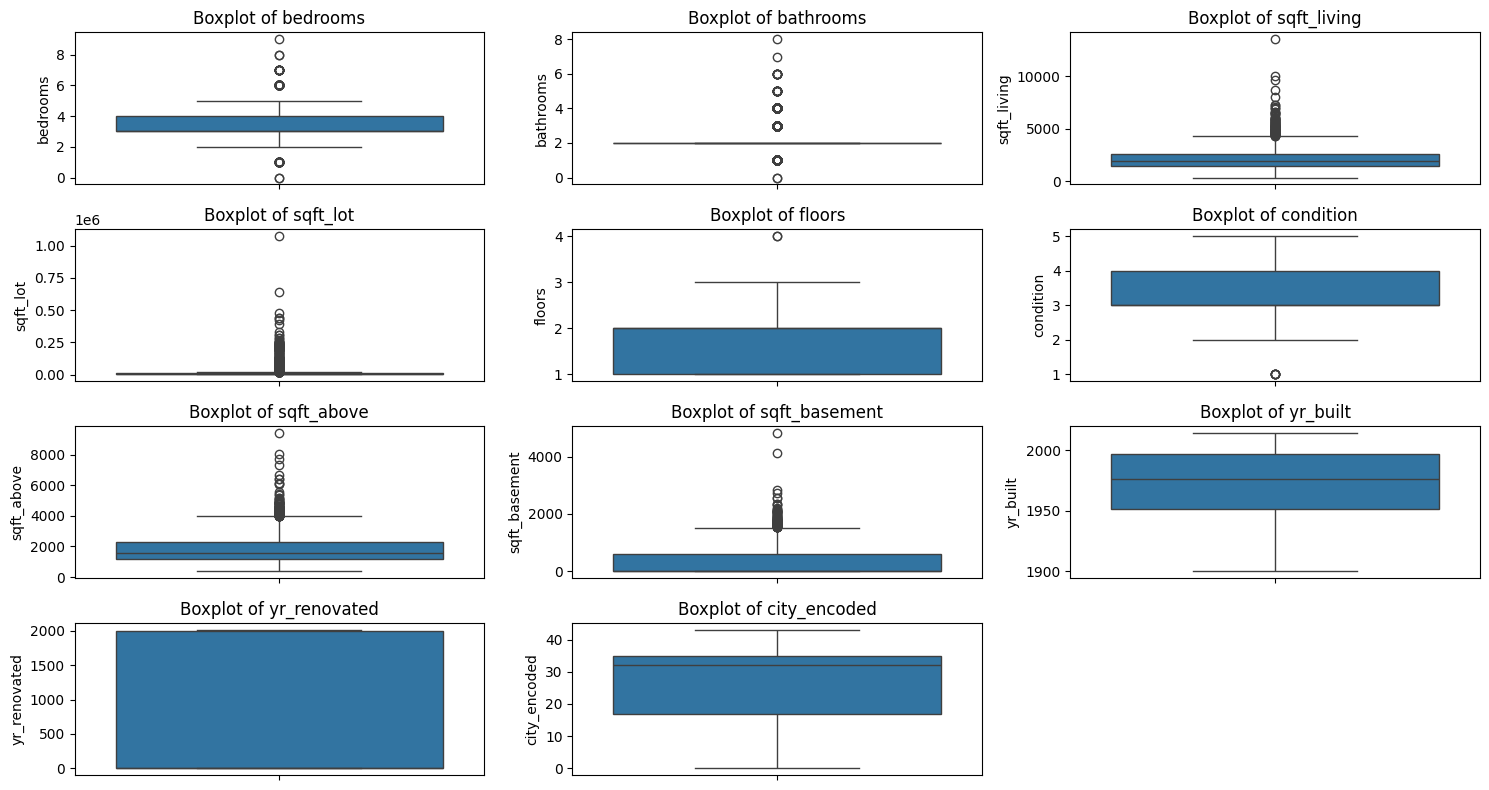

In [112]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors','condition'	,'sqft_above'	,'sqft_basement'	,'yr_built'	,'yr_renovated','city_encoded'], start=1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# **Funtion to detect outliers**

In [113]:
def detect_outliers(df):
    outliers = {}
    for col in df.columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
    return outliers

outliers = detect_outliers(df)

# **Removing all the outliers**
Outliers can skew statistical analysis and negatively impact the performance of our models, hence they are removed.

In [114]:
all_outlier_indices = set()
for feature, indices in outliers.items():
    all_outlier_indices.update(indices)

# Remove outliers
df_cleaned = df.drop(index=all_outlier_indices)
print(f"Cleaned dataset size: {df_cleaned.shape}")


Cleaned dataset size: (2517, 12)


# **Again check for outliers after removing**

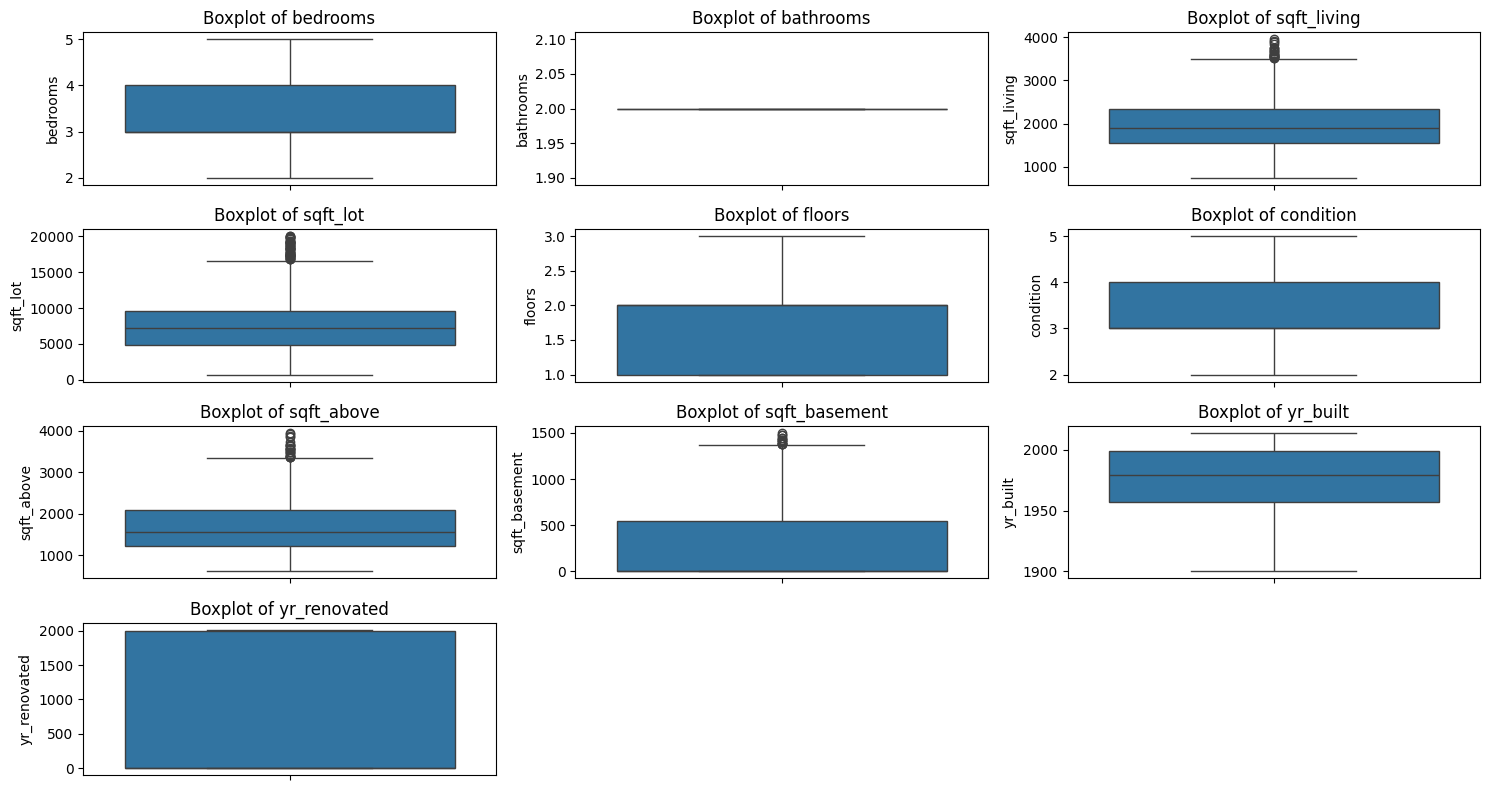

In [115]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors','condition'	,'sqft_above'	,'sqft_basement'	,'yr_built'	,'yr_renovated'], start=1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# **Scatter Plot VS Price**
Visualizing how different features relate to our target variable.

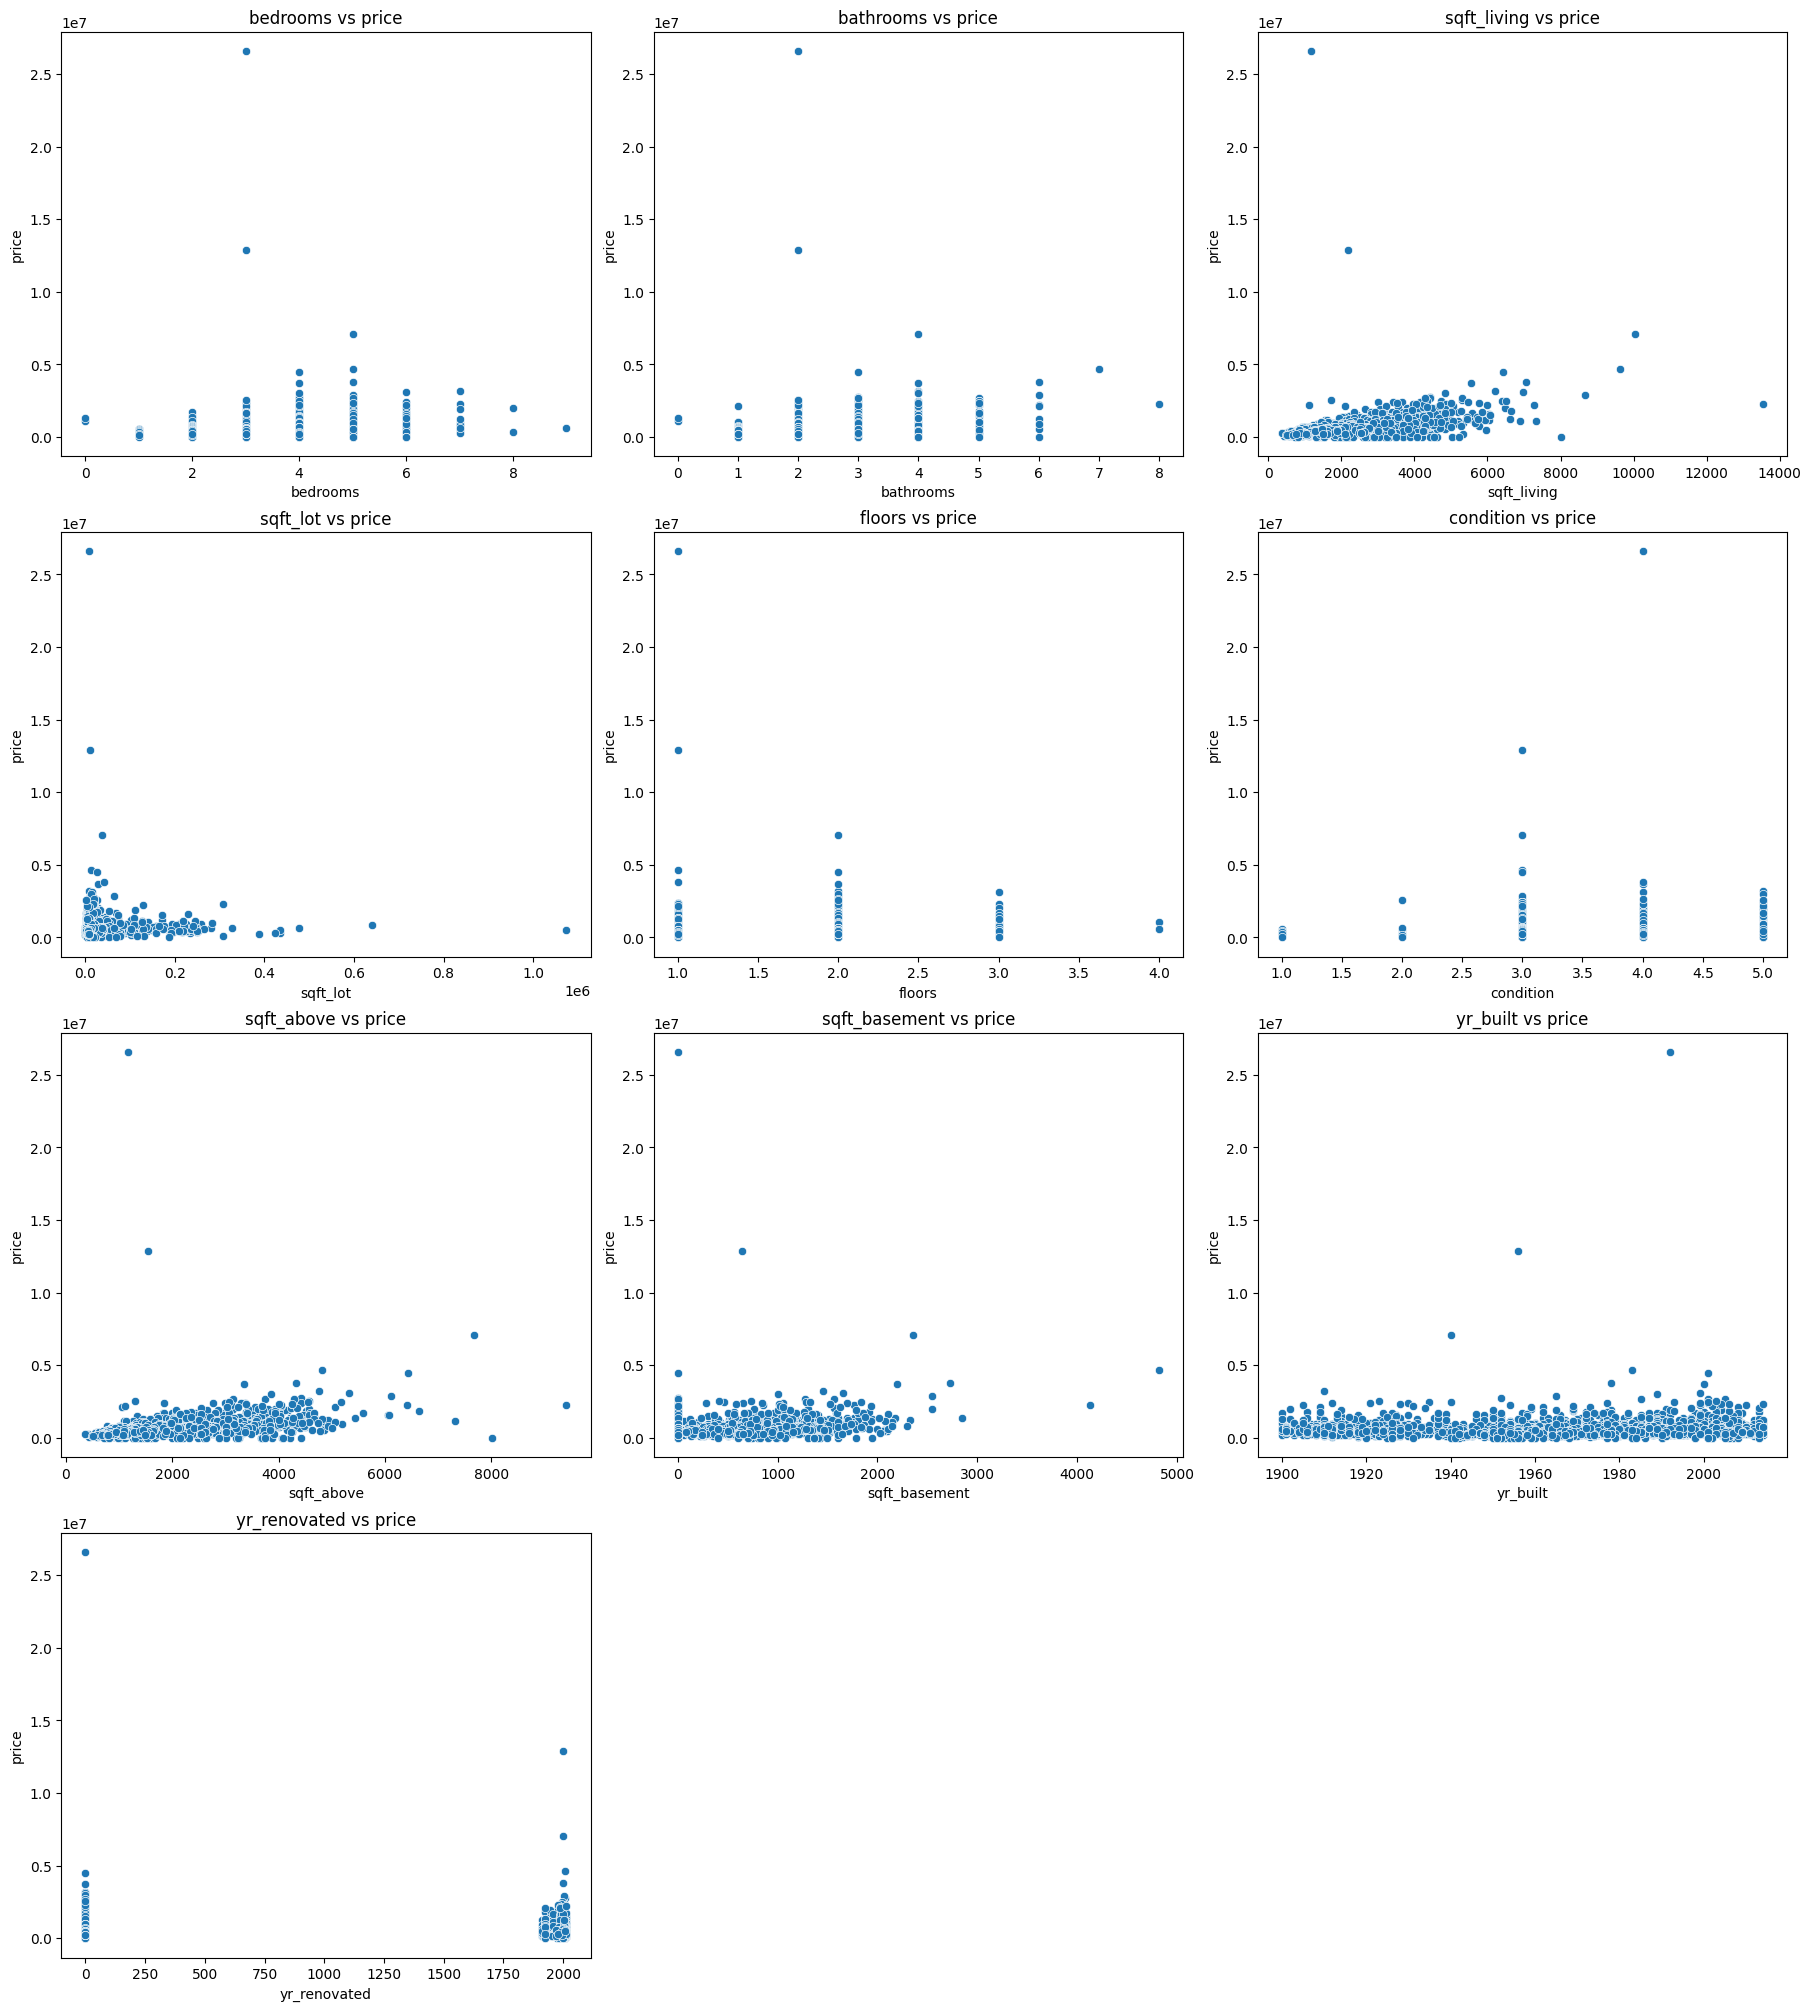

In [116]:
# Scatterplot Visualization
x_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
          'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
y_var = 'price'

num_vars = len(x_vars)
cols = 3  # Number of columns
rows = (num_vars + cols - 1) // cols  # Calculate rows to fit all variables

# Create a figure with multiple rows and columns
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5), constrained_layout=True)
axes = axes.flatten()  # Flatten to easily iterate over axes

for i, x_var in enumerate(x_vars):
    sns.scatterplot(data=df, x=x_var, y=y_var, ax=axes[i])
    axes[i].set_title(f'{x_var} vs {y_var}')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

# Hide unused subplots if any
for j in range(len(x_vars), len(axes)):
    axes[j].axis('off')

# Show the plot
plt.show()


# **Split**

 Splitting data to X and y to train and test them, also normalizing X to get a constistent range and remove biasness from features with larger values.

In [117]:
X = df.drop('price', axis=1)  # Use all features except 'price'
y = df['price']

In [118]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[-0.44112227, -0.12780529, -0.82997105, ..., -0.53101376,
         1.22167046,  0.8618055 ],
       [ 1.75970468, -0.12780529,  1.56852826, ..., -1.67469295,
        -0.82569345,  0.77834292],
       [-0.44112227, -0.12780529, -0.21736733, ..., -0.1609999 ,
        -0.82569345, -0.64052081],
       ...,
       [-0.44112227, -0.12780529,  0.90400897, ...,  1.2854179 ,
        -0.82569345,  0.5279552 ],
       [ 0.6592912 , -0.12780529, -0.05123751, ...,  0.10810108,
        -0.82569345,  0.77834292],
       [-0.44112227, -0.12780529, -0.67422434, ...,  0.64630305,
        -0.82569345, -1.39168397]])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# **Linear Regression Model before Feature Engineering**
Training a Linear Regression model on the preprocessed dataset before feature engineering.The code below:
1. Fits a LinearRegression model to the training data.
2. Predicts prices on the test set.
3. Computes evaluation metrics: MAE, MSE, RMSE, and R^2 score.
4. Creates a scatter plot comparing actual vs. predicted prices for linear regression model.


In [120]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [121]:
lr_predictions = lr_model.predict(X_test)

In [122]:
#mae
mae_lr = mean_absolute_error(y_test, lr_predictions)
print("MAE=", mae_lr)

#mse
mse_lr = mean_squared_error(y_test, lr_predictions)
print("MSE=", mse_lr)

#rmse
rmse_lr = np.sqrt(mse_lr)
print("RMSE=", rmse_lr)
#rmse_lr=root_mean_squared_log_error(y_test, lr_predictions)

#r^2
r2_lr = r2_score(y_test, lr_predictions)
r2_train_lr=r2_score(y_train, lr_model.predict(X_train))
print("R² Score=", r2_lr,r2_train_lr)

print(lr_predictions[:5])

MAE= 212865.48436338414
MSE= 989221040067.7598
RMSE= 994595.9179826548
R² Score= 0.030029327767659986 0.5264777467731707
[302955.3567271  339510.30507837 968084.31681266 567193.82637011
 363310.95611113]


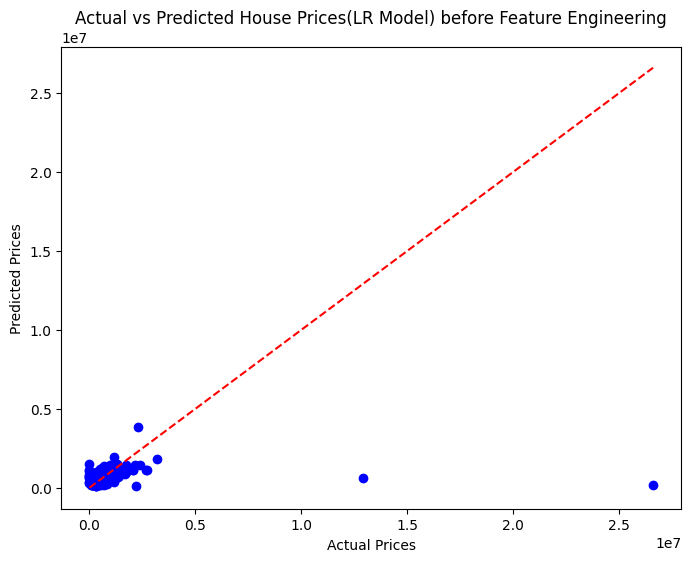

In [123]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices(LR Model) before Feature Engineering')
plt.show()


# **Decision Tree Model before Feature Engineering**
Training a Decision Tree model and evaluating its performance on the preprocessed dataset. The code below:
1. Trains a DecisionTreeRegressor on the dataset.
2. Predicts prices on the test set.
3. Computes evaluation metrics: MAE, MSE, RMSE, and R^2 score.
4. Creates a scatter plot comparing actual vs. predicted prices for decision tree model.

In [124]:
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [125]:
dt_predictions=dt_model.predict(X_test)

In [126]:
#mae
mae_dt = mean_absolute_error(y_test, dt_predictions)
print("MAE=", mae_dt)

#mse
mse_dt = mean_squared_error(y_test, dt_predictions)
print("MSE=", mse_dt)

#rmse
rmse_dt = np.sqrt(mse_dt)
print("RMSE=", rmse_dt)
#rmse_dt=root_mean_squared_log_error(y_test, dt_predictions)

cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2')
print("Mean cross-validation R² score for train:", cv_scores.mean())

cv_scores_test = cross_val_score(dt_model, X_test, y_test, cv=5, scoring='r2')
print("Mean cross-validation R² score for test:", cv_scores_test.mean())

print(dt_predictions[:5])

MAE= 221622.15486282608
MSE= 1026452267926.7515
RMSE= 1013139.806703276
Mean cross-validation R² score for train: 0.0501841052498033
Mean cross-validation R² score for test: -11.653817858066702
[ 300000.  235000. 1070000.  400000.  264950.]


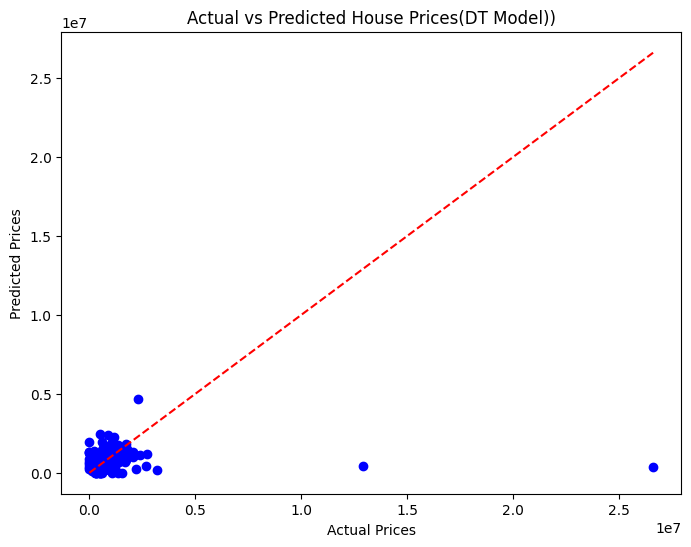

In [127]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices(DT Model))')
plt.show()


# **Random forest before feature engineering**
Training a Random forest model and evaluating its performance on the preprocessed dataset. The code below:
1. Trains a DecisionTreeRegressor on the dataset.
2. Predicts prices on the test set.
3. Computes evaluation metrics: MAE, MSE, RMSE, and R^2 score.
4. Creates a scatter plot comparing actual vs. predicted prices for random forest model

In [128]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [129]:
rf_predictions=rf_model.predict(X_test)

In [130]:
#mae
mae_rf = mean_absolute_error(y_test, rf_predictions)
print("MAE=", mae_rf)

#mse
mse_rf = mean_squared_error(y_test, rf_predictions)
print("MSE=", mse_rf)

#rmse
rmse_rf = np.sqrt(mse_rf)
print("RMSE=", rmse_rf)
#rmse_rf=root_mean_squared_log_error(y_test, rf_predictions)

#r^2
r2_rf = r2_score(y_test, rf_predictions)
r2_train_rf=r2_score(y_train, rf_model.predict(X_train))

print("R² Score=", r2_rf,r2_train_rf)


print(rf_predictions[:5])

MAE= 181579.31450594566
MSE= 987402100270.8473
RMSE= 993681.0857970717
R² Score= 0.0318128707637132 0.9388010000611088
[388051.92     376763.97803  896743.533333 452279.833333 240285.22    ]


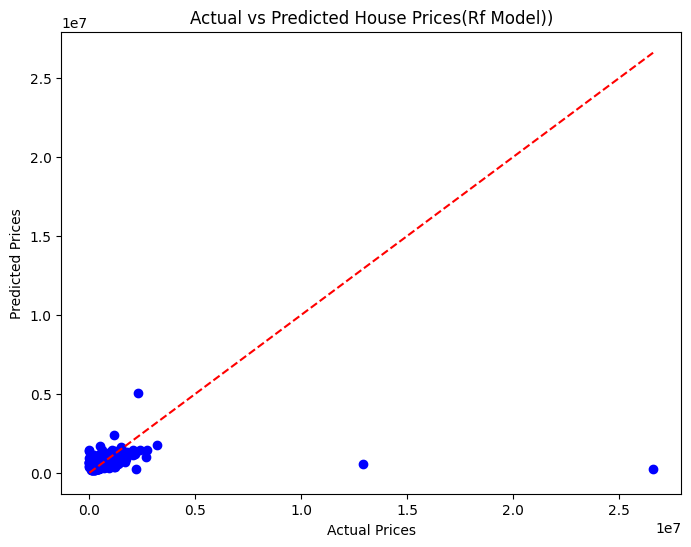

In [131]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices(Rf Model))')
plt.show()


# **Comparing Models**
Comparing the performance of the Linear Regression, Decision Tree, and Random Forest models using visualizations. The code  below:
1. Creates a DataFrame to store metrics for all the models.
2. Uses bar charts to compare model performance visually.

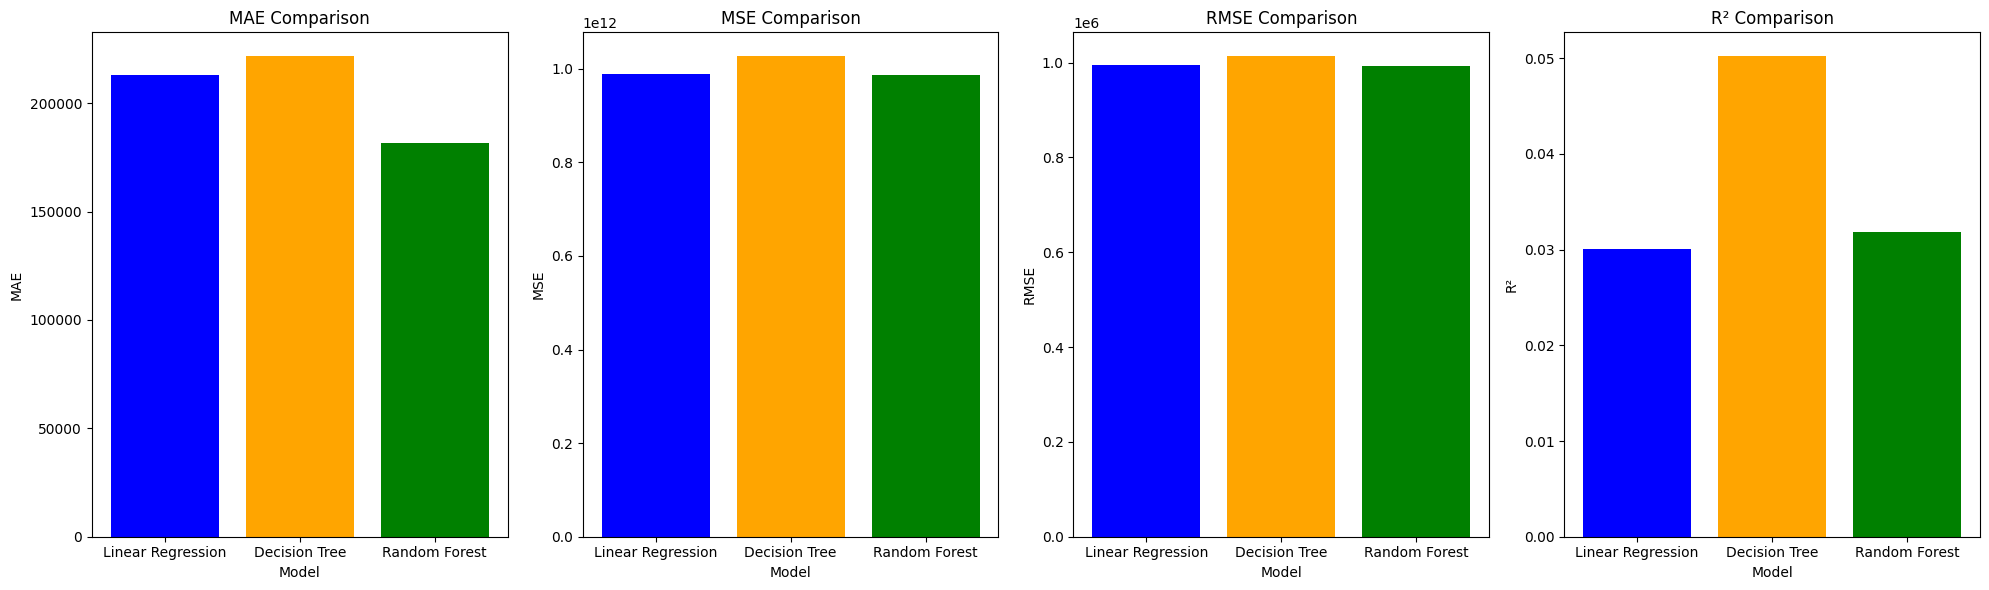

In [132]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt,mae_rf],
    'MSE': [mse_lr, mse_dt,mse_rf],
    'RMSE': [rmse_lr, rmse_dt,rmse_rf],
    'R²': [r2_lr, cv_scores.mean(),r2_rf]
})

# Set up the subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Plot each metric on its own subplot
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
for i, metric in enumerate(metrics):
    axes[i].bar(results['Model'], results[metric], color=['blue', 'orange', 'green'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# **Feature Engineering**
Modifying the dataset by creating new features to improve model performance.The code below:
1. Adds new features like total_rooms, price_per_sqft_living, is_multifloor, total_sqft, age, and is_renovated.
2. Drops unnecessary columns from the dataset.


In [133]:
current_year = 2025
df_cleaned['total_rooms'] = (df_cleaned['bedrooms'] + df_cleaned['bathrooms']).round().astype(int)
df_cleaned['price_per_sqft_living'] = df_cleaned['price'] / df_cleaned['sqft_living']
df_cleaned['is_multifloor'] = (df_cleaned['floors'] > 1).astype(int)
df_cleaned['total_sqft'] = df_cleaned['sqft_above'] + df_cleaned['sqft_basement']
df_cleaned['age'] = current_year - df_cleaned['yr_built']
df_cleaned['is_renovated'] = (df_cleaned['yr_renovated'] > 0).astype(int)

df_cleaned=df_cleaned.drop('sqft_lot', axis=1)
df_cleaned=df_cleaned.drop('yr_renovated', axis=1)

df_cleaned

,price,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,sqft_basement,yr_built,city_encoded,total_rooms,price_per_sqft_living,is_multifloor,total_sqft,age,is_renovated
0,313000.0000,3,2,1340,2,3,1340,0,1955,36,5,233.582090,1,1340,70,1
2,342000.0000,3,2,1930,1,4,1930,0,1966,18,5,177.202073,0,1930,59,0
3,420000.0000,3,2,2000,1,4,1000,1000,1963,3,5,210.000000,0,2000,62,0
4,550000.0000,4,2,1940,1,4,1140,800,1976,31,6,283.505155,0,1940,49,1
6,335000.0000,2,2,1350,1,3,1350,0,1976,31,4,248.148148,0,1350,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.6667,3,2,1510,1,4,1510,0,1954,35,5,204.083885,0,1510,71,1
4596,534333.3333,3,2,1460,2,3,1460,0,1983,3,5,365.981735,1,1460,42,1
4597,416904.1667,3,2,3010,2,3,3010,0,2009,32,5,138.506368,1,3010,16,0
4598,203400.0000,4,2,2090,1,3,1070,1020,1974,35,6,97.320574,0,2090,51,0


# **Scatter plots X vs Price**(After feature engineering)
Visualizing the relationship between new features and house prices.



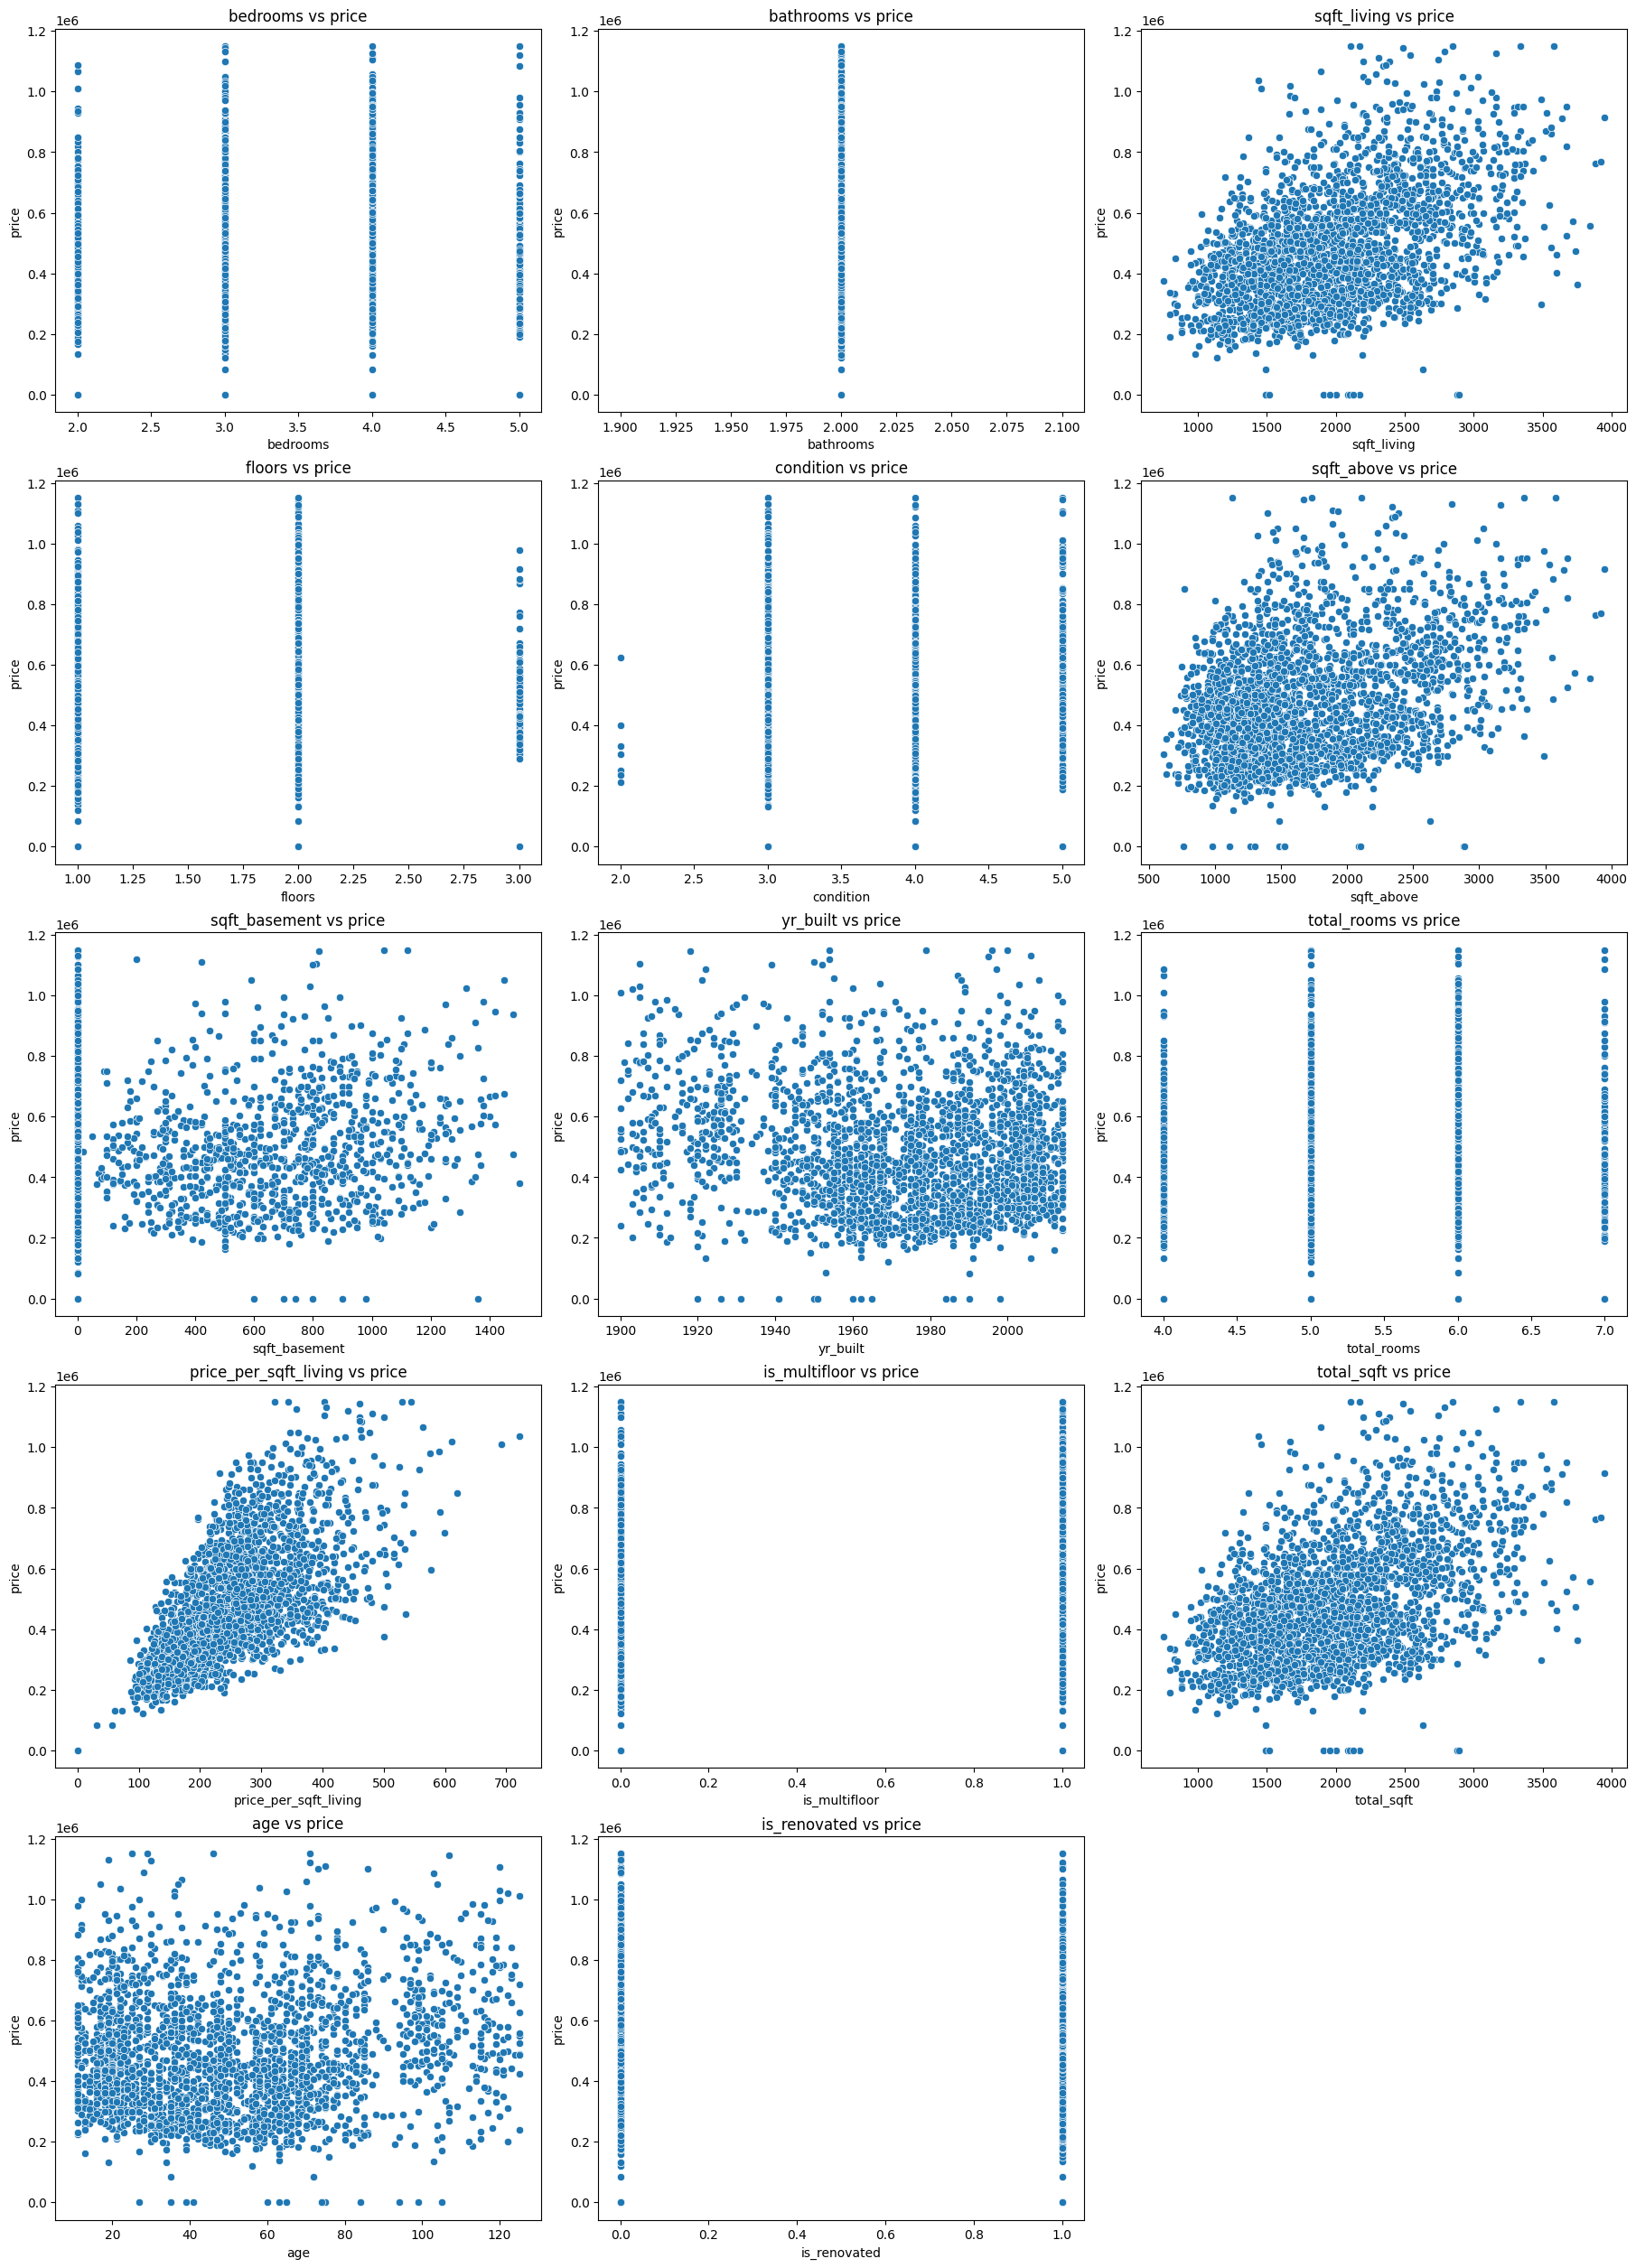

In [134]:
x_vars = ['bedrooms',	'bathrooms',	'sqft_living','floors','condition'	,'sqft_above'	,'sqft_basement'	,'yr_built'	,'total_rooms','price_per_sqft_living','is_multifloor','total_sqft','age','is_renovated']
y_var = 'price'

num_vars = len(x_vars)
cols = 3  # Number of columns
rows = (num_vars + cols - 1) // cols  # Calculate rows to fit all variables

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5), constrained_layout=True)
axes = axes.flatten()  # Flatten to easily iterate over axes

for i, x_var in enumerate(x_vars):
    sns.scatterplot(data=df_cleaned, x=x_var, y=y_var, ax=axes[i])
    axes[i].set_title(f'{x_var} vs {y_var}')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

# Hide unused subplots if any
for j in range(len(x_vars), len(axes)):
    axes[j].axis('off')

# Show the plot
plt.show()

# **Split**
Spliting the feature-engineered dataset into features and target variables, then normalizes the data. The code below:
1. Splits the cleaned dataset into X and y.
2. Normalizes X using StandardScaler.

In [135]:
# Split features and target
df_cleaned.dropna(inplace=True)
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

# Normalize X
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized


array([[-0.50362004,  0.        , -1.128593  , ..., -1.128593  ,
         0.67315282,  1.32660032],
       [-0.50362004,  0.        , -0.07614734, ..., -0.07614734,
         0.28871424, -0.75380654],
       [-0.50362004,  0.        ,  0.0487191 , ...,  0.0487191 ,
         0.39356113, -0.75380654],
       ...,
       [-0.50362004,  0.        ,  1.85036338, ...,  1.85036338,
        -1.2140911 , -0.75380654],
       [ 0.92547989,  0.        ,  0.20926166, ...,  0.20926166,
         0.00912255, -0.75380654],
       [-0.50362004,  0.        , -0.86102207, ..., -0.86102207,
        -0.55006083, -0.75380654]])

# **LR Training after Feature Engineering**
Training a Linear Regression model and evaluating its performance on the feature-engineered dataset. The code below:
1. Trains a LinearRegression on the dataset.
2. Predicts prices on the test set.
3. Computes evaluation metrics: MAE, MSE, RMSE, and R^2 score.
4. Creates a scatter plot comparing actual vs. predicted prices for Linear Regression model

In [136]:
# Spliting training &testing set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

In [137]:
#mae
mae_lr = mean_absolute_error(y_test, lr_predictions)
print("MAE=", mae_lr)

#mse
mse_lr = mean_squared_error(y_test, lr_predictions)
print("MSE=", mse_lr)

#rmse
rmse_lr = np.sqrt(mse_lr)
print("RMSE=", rmse_lr)
#rmse_lr=root_mean_squared_log_error(y_test, lr_predictions)

#r^2
r2_lr = r2_score(y_test, lr_predictions)
r2_train_lr=r2_score(y_train, lr_model.predict(X_train))
print("R² Score=", r2_lr,r2_train_lr)

print(lr_predictions[:5])

MAE= 33015.0585866523
MSE= 2206965785.970166
RMSE= 46978.35444085037
R² Score= 0.9408207312310356 0.9392462475717496
[700797.17470556 358361.01286885 250602.39713548 635328.53008287
 605310.28231388]


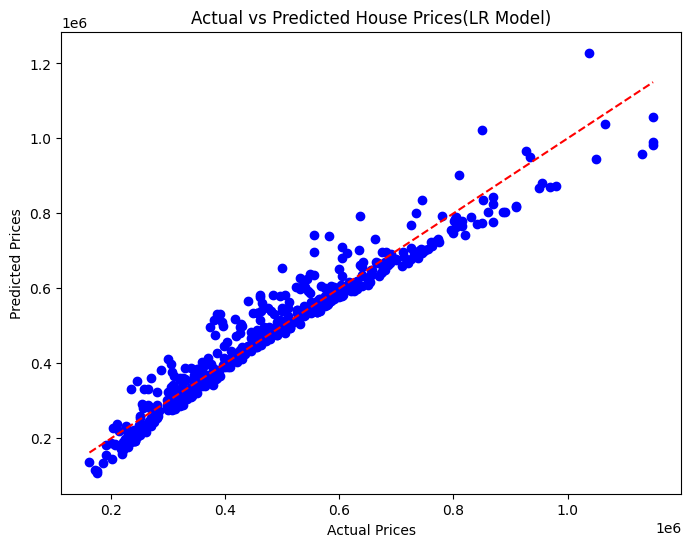

In [138]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices(LR Model)')
plt.show()


# **DT Training after Feature Engineering**
Trains a Decision Tree model with hyperparameter tuning using GridSearchCV. The Code below:

1. Uses GridSearchCV to find the best hyperparameters for the DecisionTreeRegressor.
3. Trains the best model on the dataset.
3. Predicts house prices and evaluates performance.


In [139]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
dt_model=DecisionTreeRegressor(random_state=42,max_depth=10)
grid_search = GridSearchCV(dt_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_
dt_predictions = best_dt_model.predict(X_test)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [140]:
#mae
mae_dt = mean_absolute_error(y_test, dt_predictions)
print("MAE=", mae_dt)

#mse
mse_dt = mean_squared_error(y_test, dt_predictions)
print("MSE=", mse_dt)

#rmse
rmse_dt = np.sqrt(mse_dt)
print("RMSE=", rmse_dt)
#rmse_dt=root_mean_squared_log_error(y_test, dt_predictions)

cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2')
print("Mean cross-validation R² score for train:", cv_scores.mean())

cv_scores_test = cross_val_score(dt_model, X_test, y_test, cv=5, scoring='r2')
print("Mean cross-validation R² score for test:", cv_scores_test.mean())

print(dt_predictions[:5])

MAE= 15434.008741203701
MSE= 648470887.4481535
RMSE= 25465.09154603913
Mean cross-validation R² score for train: 0.98044401167605
Mean cross-validation R² score for test: 0.9077291357758671
[736750.         358437.33333333 267500.         656296.
 644666.66666667]


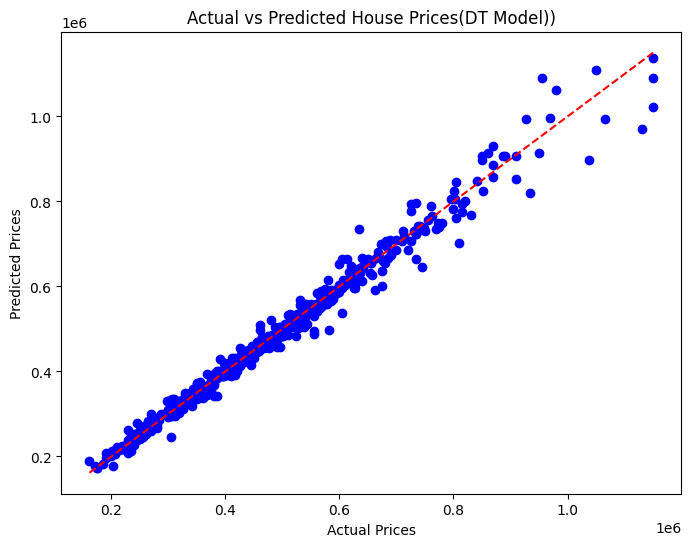

In [141]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices(DT Model))')
plt.show()


# **RF Training after Feature Engineering**
Training a Random Forest model with hyperparameter tuning to optimize its performance. The code below:
1. Uses GridSearchCV to find the best hyperparameters for the RandomForestRegressor.
2. Trains the best model on the dataset.
3. Predicts house prices and evaluates performance.



In [152]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Best parameters from grid search for Random Forest
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

rf_predictions = best_rf_model.predict(X_test)


Best Parameters for Random Forest: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [153]:
#mae
mae_rf = mean_absolute_error(y_test, rf_predictions)
print("MAE=", mae_rf)

#mse
mse_rf = mean_squared_error(y_test, rf_predictions)
print("MSE=", mse_rf)

#rmse
rmse_rf = np.sqrt(mse_rf)
print("RMSE=", rmse_rf)
#rmse_rf=root_mean_squared_log_error(y_test, rf_predictions)

#r^2
r2_rf = r2_score(y_test, rf_predictions)
r2_train_rf=r2_score(y_train, rf_model.predict(X_train))

print("R² Score=", r2_rf,r2_train_rf)


print(rf_predictions[:5])

MAE= 7531.593882573668
MSE= 357999808.7782911
RMSE= 18920.88287523315
R² Score= 0.9904003192810644 0.9992106743659694
[750482.41111111 343504.86888889 270225.09635417 657949.58666667
 637681.61111041]


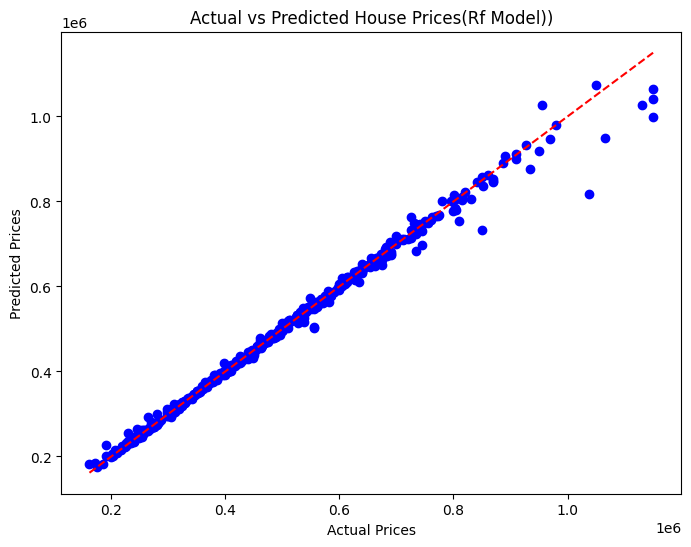

In [154]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices(Rf Model))')
plt.show()


# **Comparing models**
Comparing the performance of the Linear Regression, Decision Tree, and Random Forest models after feature engineering using visualizations. The code  below:
1. Creates a DataFrame to store metrics for all the models.
2. Uses bar charts to compare model performance visually.

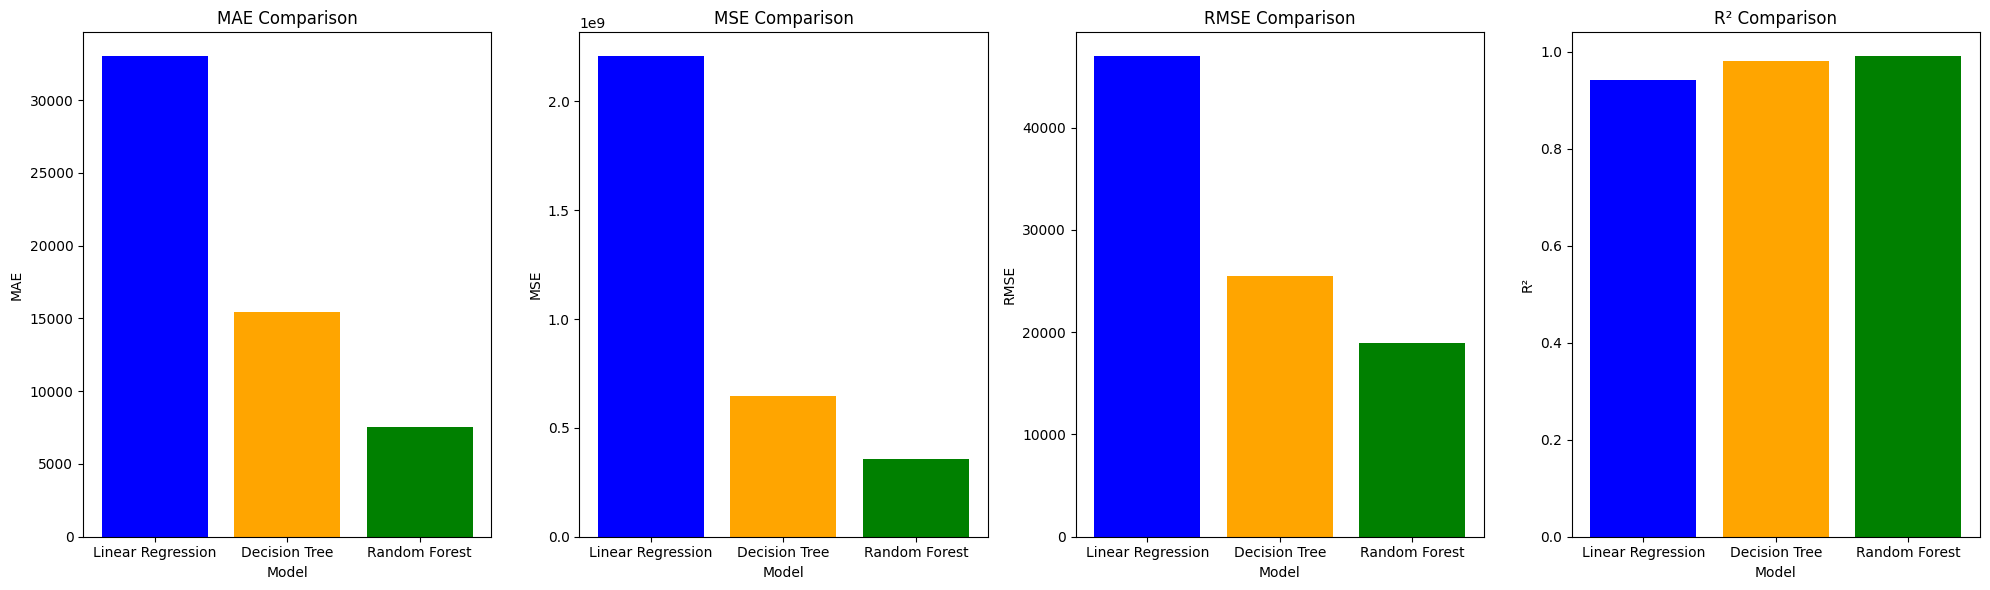

In [155]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt,mae_rf],
    'MSE': [mse_lr, mse_dt,mse_rf],
    'RMSE': [rmse_lr, rmse_dt,rmse_rf],
    'R²': [r2_lr, cv_scores.mean(),r2_rf]
})

# Set up the subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Plot each metric on its own subplot
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
for i, metric in enumerate(metrics):
    axes[i].bar(results['Model'], results[metric], color=['blue', 'orange', 'green'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# **Comparing results**
Comparing all models by printing actual and predicted prices.

In [156]:
comparison_lr = pd.DataFrame({
    'Actual': y_test[:5].values,
    'Predicted': (lr_predictions[:5]).round(),
    'Differnece': y_test[:5].values-(lr_predictions[:5]).round()
})
print(comparison_lr)


     Actual  Predicted  Differnece
0  747500.0   700797.0     46703.0
1  342400.0   358361.0    -15961.0
2  269950.0   250602.0     19348.0
3  655000.0   635329.0     19671.0
4  640000.0   605310.0     34690.0


In [157]:
comparison_dt = pd.DataFrame({
    'Actual': y_test[:5].values,
    'Predicted': (dt_predictions[:5]).round(),
    'Differnece': y_test[:5].values-(dt_predictions[:5]).round()
})
print(comparison_dt)


     Actual  Predicted  Differnece
0  747500.0   736750.0     10750.0
1  342400.0   358437.0    -16037.0
2  269950.0   267500.0      2450.0
3  655000.0   656296.0     -1296.0
4  640000.0   644667.0     -4667.0


In [158]:
comparison_rf = pd.DataFrame({
    'Actual': y_test[:5].values,
    'Predicted': (rf_predictions[:5]).round(),
    'Differnece': y_test[:5].values-(rf_predictions[:5]).round()

})
print(comparison_rf)


     Actual  Predicted  Differnece
0  747500.0   750482.0     -2982.0
1  342400.0   343505.0     -1105.0
2  269950.0   270225.0      -275.0
3  655000.0   657950.0     -2950.0
4  640000.0   637682.0      2318.0
